# Ngen: modelando el incendio de los bosques

![](imgs/diagrama.png)

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from ngen.model import Solver
from ngen.preprocessing import img2matrix

## Mapeo de imagenes

Las imagenes obtenidas con el dron las mapeamos a las distintas matrices que necesita el modelo como input: coordenadas del fuego y mapeo de los materiales del bosque.

![](imgs/img1.png)
![](imgs/img2.png)
![](imgs/img3.png)

![](imgs/test1.jpg)

In [2]:
# Get 4 matrix:
# - Fire position
# - Thermal conductivity of each pixel (K)
# - Heat capacity of each pixel (Cp)
# - Density of each pixel (Rho)

img_path = 'imgs/test1.jpg'
pixel_size = 2.7 # in meters
fire, Rho, Cp, K = img2matrix(img_path, pixel_size)

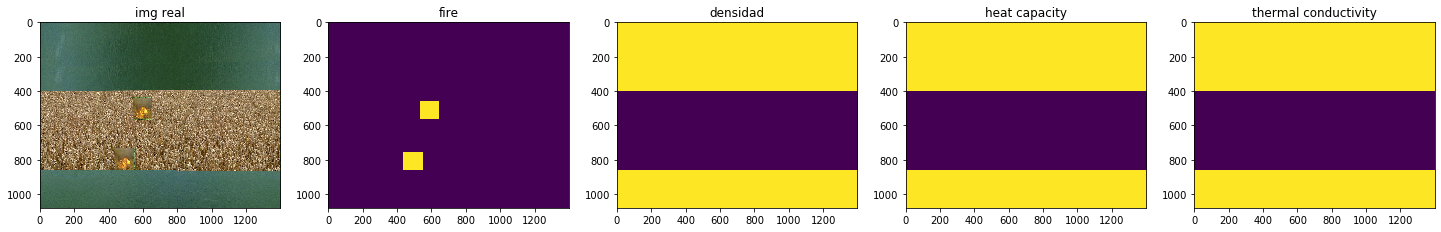

In [3]:
img_real = np.array(Image.open(img_path))
titles = ['img real', 'fire', 'densidad', 'heat capacity', 'thermal conductivity']

fig, axes = plt.subplots(1, 5, figsize=(25, 6))
for ax, img, title in zip(axes, [img_real, fire, Rho, Cp, K], titles):
    ax.imshow(img)
    ax.set_title(title)

plt.show()

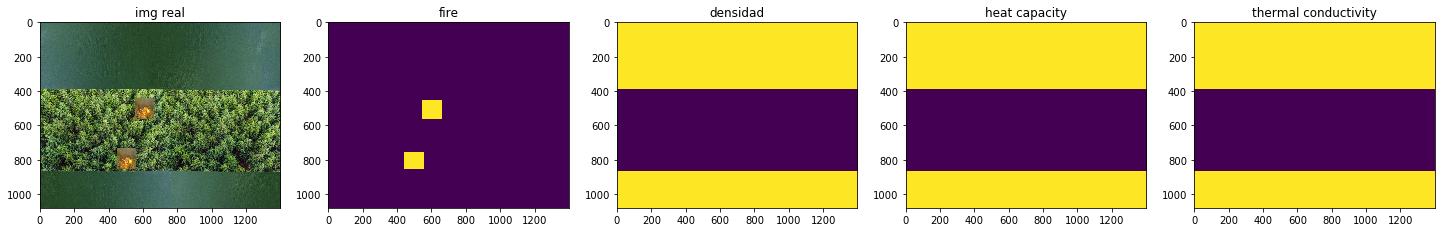

In [4]:
img_path = 'imgs/test2.jpg'
pixel_size = 2.7 # in meters
fire, Rho, Cp, K = img2matrix(img_path, pixel_size)

img_real = np.array(Image.open(img_path))
titles = ['img real', 'fire', 'densidad', 'heat capacity', 'thermal conductivity']

fig, axes = plt.subplots(1, 5, figsize=(25, 6))
for ax, img, title in zip(axes, [img_real, fire, Rho, Cp, K], titles):
    ax.imshow(img)
    ax.set_title(title)

plt.show()

# Modelado

Partiendo de la ecuacion del calor de Fourier (en dos dimensiones inicialemnte) y considerando materiales no isotropicos que varian en funcion de la posicion y de la temperatura y agregando un termino para modelar la influencia del viento obtenemos obtenemos:

$$\frac{\partial T}{\partial t} = \rho c_{p} \left[ \frac{\partial}{\partial x} \left( k \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left( k \frac{\partial T}{\partial y} \right) \right] + [W_{x}, W_{y}] \cdot \left[ \frac{\partial T}{\partial x}, \frac{\partial T}{\partial y} \right] $$

Donde

$$\left\{
\begin{array}{ll}
\rho  & \textrm{Densidad de cada material} & \left[ \frac{Kg}{m^{3}} \right]\\
c_{p} & \textrm{Calor especifico de cada material} & \left[ \frac{J}{K Kg} \right]\\
k & \textrm{Conductividad terminca de cada material} & \left[ \frac{W}{mK} \right]\\
W & \textrm{Vector de viento} & \left[ \frac{m}{s} \right]
\end{array}
\right.$$

Ademas notar que $k, \rho, c_{p}$ son variables que dependen de la posicion y de la temperatura

In [ ]:
# Config
W = np.array([0, 0])
pixel_size = 2.7
total_time = 3600 # Tiempo de la prediccion
img_at = 5         # Guarda una img para el gif final cada 5% del tiempo a simular

model = Solver(fire, Rho, Cp, K, W, pixel_size, total_time, img_at)
model.solve()
model.plot()

## TODO

  - Modelo 3d
  - Forma automatica de calcular el tamano del pixel
  - Interpolar los pixel para tener resolucion espacial 